# Regression Neuron
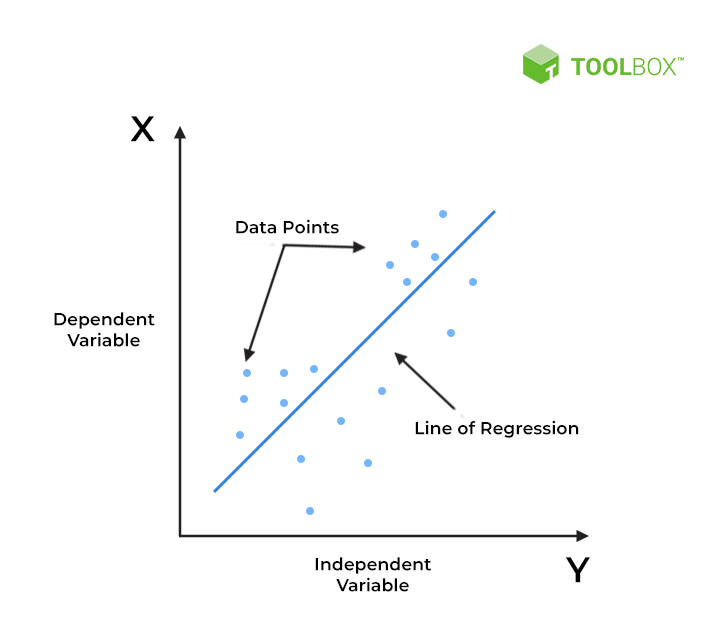

# Overview
Linear regression is a popular supervised learning algorithm used in machine learning to model the relationship between a dependent variable and one or more independent variables. The goal is to fit a linear function to the data that best predicts the value of the dependent variable based on the values of the independent variables.

The algorithm works by first calculating the correlation between the variables, and then finds the slope and intercept of the linear function that minimizes the sum of squared errors between the predicted and actual values.

# Advantage
1. Easy to implement and understand.
2. Can handle both continuous and categorical independent variables.

# Disadvantage
1. Assumes a linear relationship between the dependent and independent variables, which may not hold for all data. 
2. Sensitive to outliers which can dampen the model's accuracy.

# Data
The Wisconsin Breast Cancer Dataset is a collection of medical data on breast cancer patients, at the University of Wisconsin Hospitals. The dataset contains information on 569 breast cancer patients and includes measurements of 30 different features of their cancer cells, such as radius, texture, and concavity.

The goal of is to estimate and predict the linearlity of some of the cancer cells characteristics.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme() 
df = pd.read_csv("WiscosinBreastCancerDiagnostic.csv")

We try to visualize the linearity of some cancer cells characteristics using pair plot.

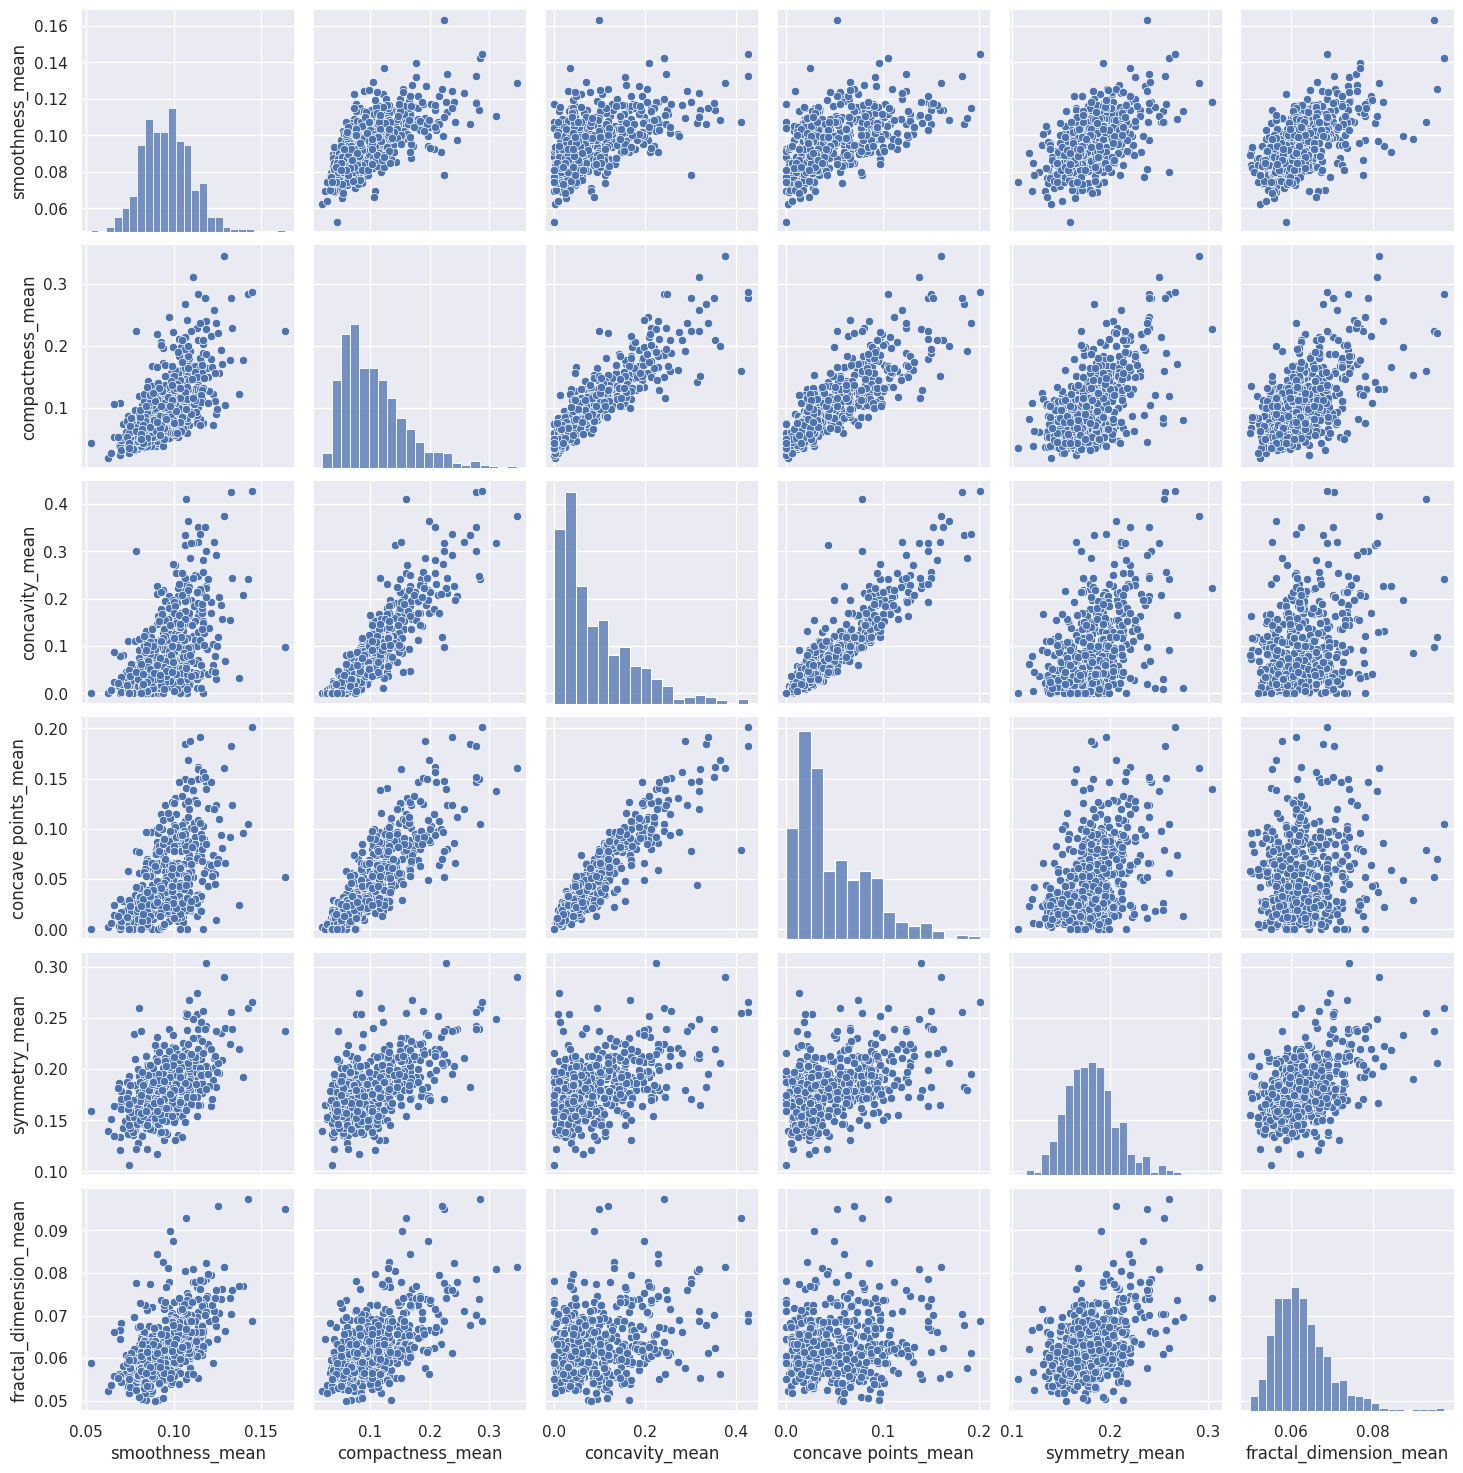

In [3]:
df_pairplot = df[df.columns[6:12]]
sns.pairplot(df_pairplot)

Since compactness and concavity seems to have high correlation, we chooses to visualize and test our regression neuron on those 2 variables. 

[Text(0.5, 1.0, 'Regression visualization'),
 Text(0.5, 0, 'Compactness mean'),
 Text(0, 0.5, 'Concavity mean')]

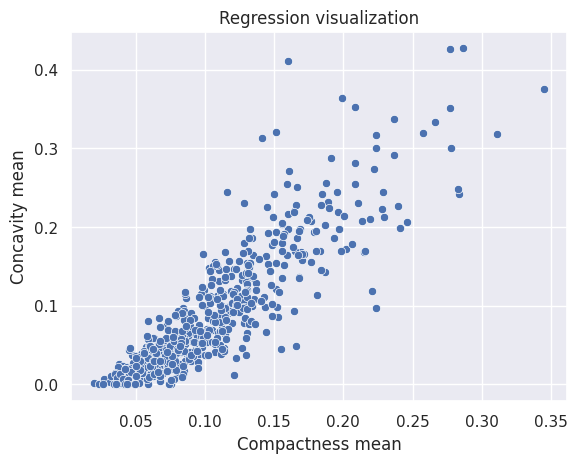

In [4]:
sns.scatterplot(data=df, x="compactness_mean", y="concavity_mean").set(
                                        title='Regression visualization', 
                                        xlabel='Compactness mean', 
                                        ylabel='Concavity mean')


We made a Python class for the regression neuron algorithm that stores scaling, epochs, weights, and training errors. It includes training, input, and predict methods.

In [5]:
class RegressionNeuron:
    
    # Initialize class
    def __init__(self, learning_rate = .001, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def initWeightBias(self, X, y):
        n_features = X.shape[1]
        self.weights = np.random.rand(n_features)
        self.bias = np.random.rand()
        
    def activation_func(self, output):
        return output
        
    def predict(self, X):
        output = np.dot(X, self.weights) + self.bias
        pred_output = self.activation_func(output)
        return pred_output
        
    def train(self, X, y):
        self.initWeightBias(X, y)
        self.errors_ = []
        n_samples = X.shape[0]
        for epo in range(self.epochs):
            errors = 0
            for x_i, y_i in zip(X, y):
                pred_output = self.predict(x_i)
                update = self.learning_rate * (pred_output - y_i)
                # Gradient descent for perceptron
                self.weights = self.weights - update * x_i
                self.bias = self.bias - update
                errors = errors + .5*((pred_output - y_i)**2)
            self.errors_.append(errors/n_samples)

We extract and reshape the data. We also create an instance of the Regression neuron class and train this instance.

In [6]:
# Extract data            
X = df.compactness_mean.values
X = X.reshape(-1, 1)
y = df.concavity_mean.values

# Create model
regression_neuron = RegressionNeuron()
regression_neuron.train(X, y)


To evaluate the accuracy of our linear regression model, we plot the predicted values against the actual values for the two variables of interest. The resulting scatter plot allows us to visually compare the performance of the model. Ideally, the predicted values should closely align with the actual values, resulting in a scatter plot where the data points cluster around a diagonal line. 

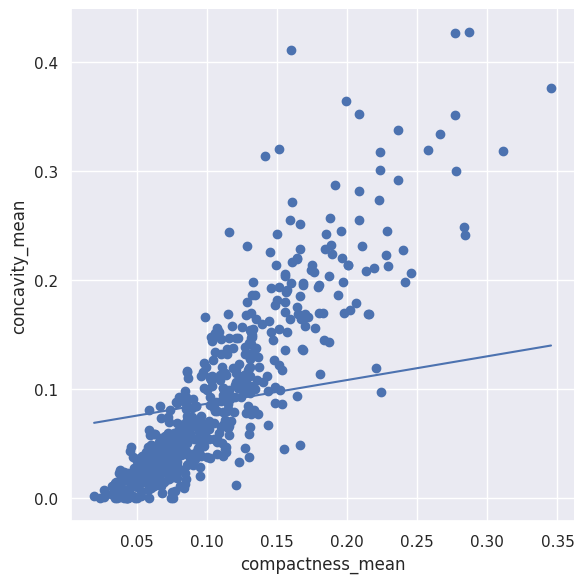

In [9]:
domain = np.linspace(np.min(X), np.max(X), 100)
domain_pred = regression_neuron.predict(domain.reshape(-1, 1))
g = sns.FacetGrid(df, height = 6)
g = g.map(plt.scatter, "compactness_mean", "concavity_mean")
plt.plot(domain, domain_pred)
plt.show()

From the looks of it, there is huge deviations from this line which indicate large errors in our predictions. Now we visualize how the errors of our percetron changes over many epoches.

[Text(0.5, 1.0, 'Errors over epochs'),
 Text(0.5, 0, 'Number of epochs'),
 Text(0, 0.5, 'MSE')]

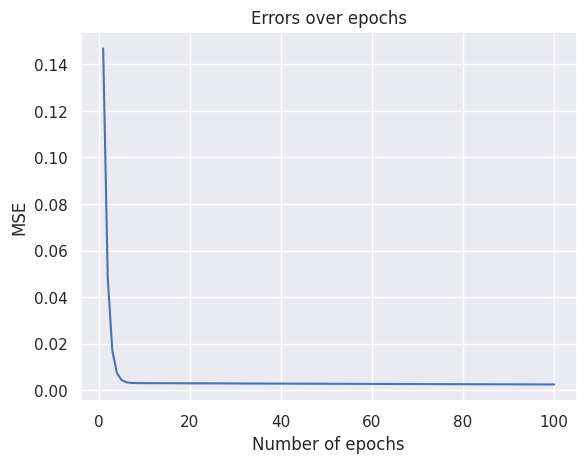

In [8]:
x_axis = range(1, len(regression_neuron.errors_)+1)
y_axis = regression_neuron.errors_
sns.lineplot(x=x_axis, y=y_axis).set(title='Errors over epochs', 
                                        xlabel='Number of epochs', 
                                        ylabel='MSE')

Despite the large deviations, our erros does look very small. We can try improving our model by tweakings our learning rate and epoches.

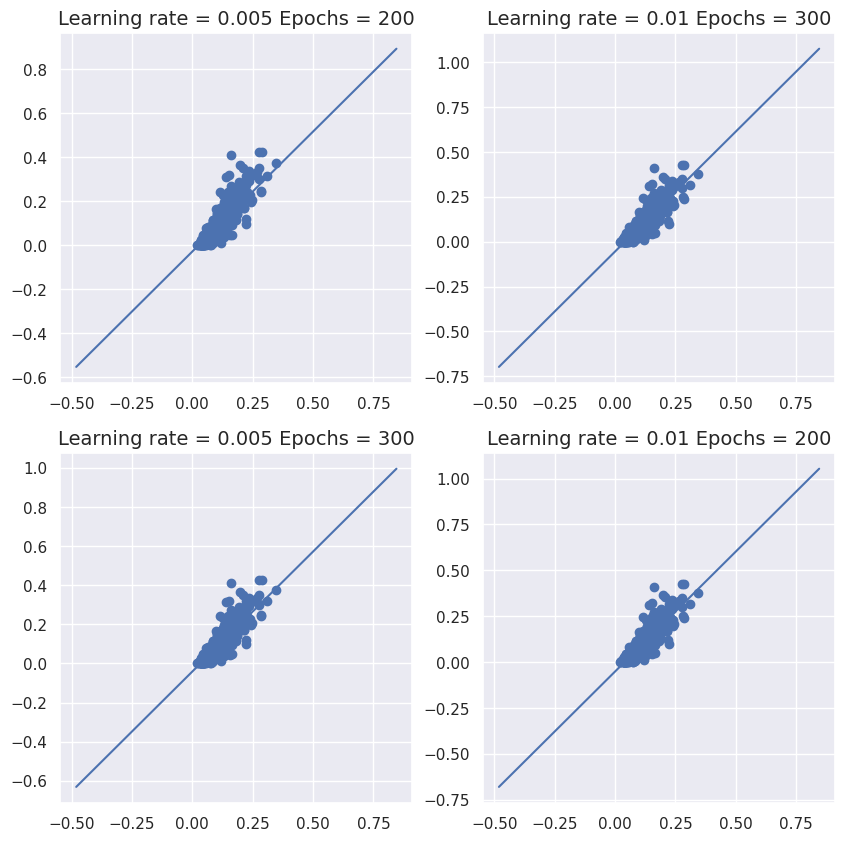

In [10]:
# Try different learning rate and epoch
learning_rates = [.005, .01, .005, .01]
epochs = [200, 300, 300, 200]
mse = []
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

fig, axs = plt.subplots(2, 2, figsize=(10,10))
for ax, lr, epo in zip(axs.flat, learning_rates, epochs):
    regression_neuron = RegressionNeuron(learning_rate=lr, epochs=epo)
    regression_neuron.train(X, y)
    mse.append(regression_neuron.errors_)
    domain_pred = regression_neuron.predict(domain.reshape(-1, 1))
    ax.plot(domain, domain_pred)
    ax.scatter(X, y)
    ax.set_title("Learning rate = " + str(lr) + " Epochs = " + str(epo),
                 fontsize = 14)

Changing our learning rate does actually works. Our model does look much better than initially. We can also visualize our errors of our new models.

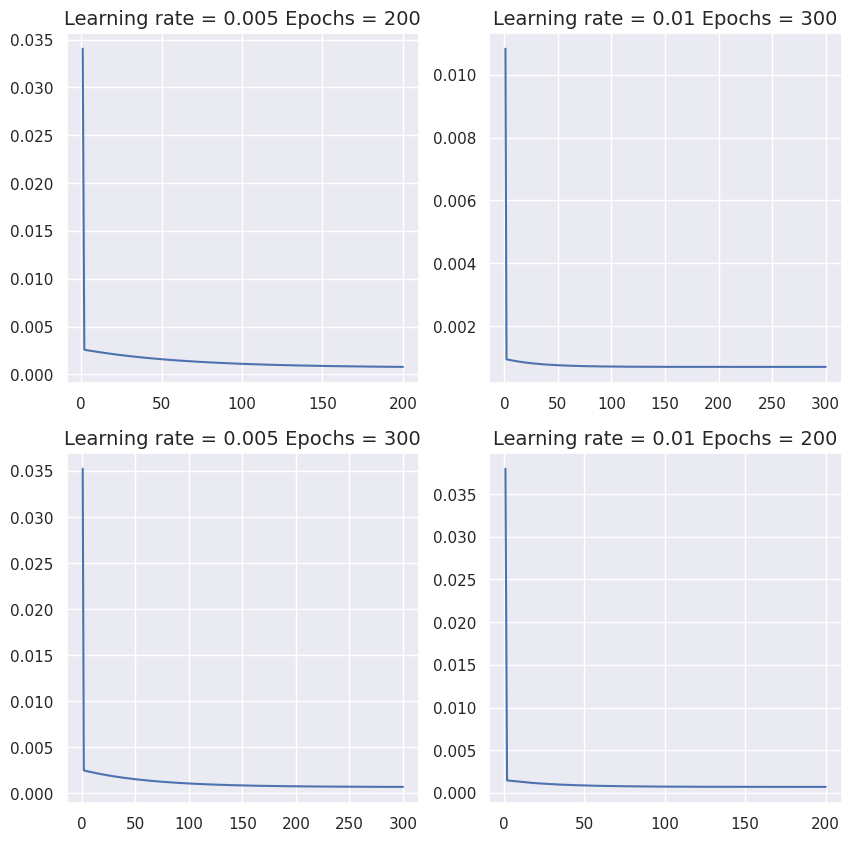

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
for ax, error, lr, epo in zip(axs.flat, mse, learning_rates, epochs):
    x_axis = range(1, len(error)+1)
    y_axis = error
    ax.plot(x_axis, y_axis)
    ax.set_title("Learning rate = " + str(lr) + " Epochs = " + str(epo),
                 fontsize = 14)

Our errors are indeed smaller (< 0.005) comapred to our previous models (< 0.02). We can check the final MSE of our new models at the end of our epoch iterations.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Learning rate = 0.005 Epochs = 200'),
  Text(1, 0, 'Learning rate = 0.01 Epochs = 300'),
  Text(2, 0, 'Learning rate = 0.005 Epochs = 300'),
  Text(3, 0, 'Learning rate = 0.01 Epochs = 200')])

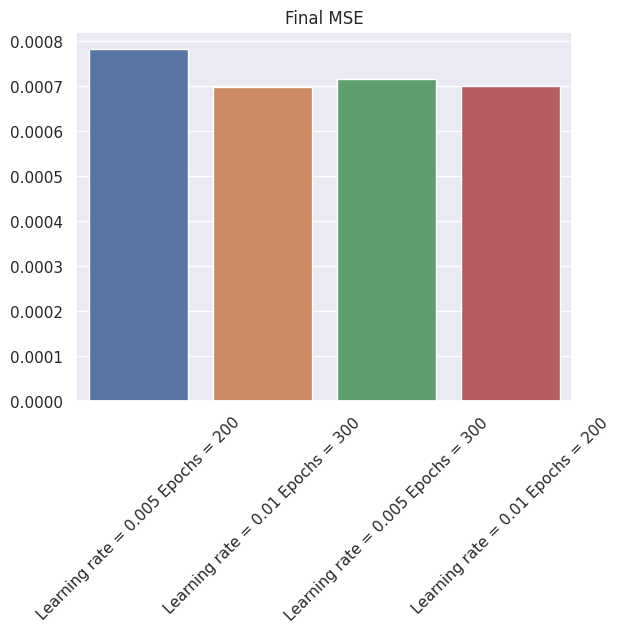

In [13]:
label = []
finalmse = []
for lr, epo, error in zip(learning_rates, epochs, mse):
    label.append("Learning rate = " + str(lr) + " Epochs = " + str(epo))
    finalmse.append(error[-1])
sns.barplot(x=label, y=finalmse).set(title='Final MSE') 
plt.xticks(rotation=45)

# Conclusion
The choice of learning rate and epoch is a very crucial hyperparameter in training a linear regression neuron model. The learning rate determines how fast the algorithm updates the weights of the model in response to the gradient of the loss function, and this significantly impacts the accuracy of our results.